# Setup

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.stats import zscore
%matplotlib inline

In [2]:
code_dir=Path.cwd()
project_dir=code_dir.parent
input_dir=project_dir/"input"
output_dir=project_dir/"output/surface_contextualization"
tmp_dir=project_dir/"tmp"

In [3]:
output_dirs = ["hub_atrophy", "neighborhood", "gradients", "spatial_correlations", "structural_connectomes", "functional_connectomes", "thickness_maps", "brainsmash", "tmp"]

for dir in output_dirs:
    Path(output_dir/dir).mkdir(parents=True, exist_ok=True)

In [4]:
atlas_resolution=400

In [5]:
thickness_data_schaefer = pd.read_csv(project_dir/"output/pls/pls_ukb_bootstrap_schaefer_df.csv", index_col=0).to_numpy().squeeze()

## Load connectivity matrices

In [6]:
from enigmatoolbox.datasets import load_sc, load_fc

from nilearn import plotting

# Load cortico-cortical functional connectivity data

fc_ctx, fc_ctx_labels, _, _ = load_fc(parcellation=f'schaefer_{atlas_resolution}')

# Load cortico-cortical structural connectivity data

sc_ctx, sc_ctx_labels, _, _ = load_sc(parcellation=f'schaefer_{atlas_resolution}')

# Hub susceptibility

In [7]:
%load_ext autoreload
%autoreload 2
from python_functions.surface_contextualization import weighted_degree_centrality # https://csi-hamburg.github.io/python_functions

In [8]:
import numpy as np

from enigmatoolbox.plotting import plot_cortical

from enigmatoolbox.utils.parcellation import parcel_to_surface

In [9]:
result_dictionary = dict()

In [10]:
# Compute weighted degree centrality measures from the connectivity data
fc_ctx_dc_rank = weighted_degree_centrality(fc_ctx, rank=True)
sc_ctx_dc_rank = weighted_degree_centrality(sc_ctx, rank=True)

# Project the results on the surface brain
img = plot_cortical(array_name=parcel_to_surface(fc_ctx_dc_rank + 1, f'schaefer_{atlas_resolution}_conte69'), surface_name="conte69", size=(800, 200),
              cmap='Reds', color_bar=True, color_range=(1,atlas_resolution), embed_nb=True, interactive=False, transparent_bg=False, 
              screenshot=True, filename=f"{output_dir}/hub_atrophy/fc_degree_rank.png")

img = plot_cortical(array_name=parcel_to_surface(sc_ctx_dc_rank + 1, f'schaefer_{atlas_resolution}_conte69'), surface_name="conte69", size=(800, 200),
              cmap='Blues', color_bar=True, color_range=(1,atlas_resolution), embed_nb=True, interactive=False, transparent_bg=False, 
              screenshot=True, filename=f"{output_dir}/hub_atrophy/sc_degree_rank.png")

In [11]:
from python_functions.surface_contextualization import perform_spins # https://csi-hamburg.github.io/python_functions

analysis = "Functional degree centrality"
analysis_lower=analysis.replace(" ","_").lower()

r, p, d = perform_spins(
    fc_ctx_dc_rank,
    thickness_data_schaefer,
    atlas_resolution="400")

result_dictionary[analysis_lower] = (r,p,d,fc_ctx_dc_rank)

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000


In [12]:
from python_functions.surface_contextualization import perform_spins # https://csi-hamburg.github.io/python_functions

analysis = "Structural degree centrality"
analysis_lower=analysis.replace(" ","_").lower()

r, p, d = perform_spins(
    sc_ctx_dc_rank,
    thickness_data_schaefer,
    atlas_resolution="400")

result_dictionary[analysis_lower] = (r,p,d,sc_ctx_dc_rank)

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000


# Neighborhood abnormality

In [13]:
from python_functions.surface_contextualization import neighborhood_abnormality # https://csi-hamburg.github.io/python_functions

In [ ]:
from enigmatoolbox.plotting import plot_cortical

nghbr_fc_schaefer = neighborhood_abnormality(fc_ctx, thickness_data_schaefer, fc_ctx_labels)
nghbr_sc_schaefer = neighborhood_abnormality(sc_ctx, thickness_data_schaefer, sc_ctx_labels)

plot_cortical(array_name=parcel_to_surface(nghbr_fc_schaefer, f'schaefer_{atlas_resolution}_conte69'), 
                surface_name="conte69", size=(800, 200),
                cmap='Reds', color_bar=True, embed_nb=True, 
                interactive=True, transparent_bg=False, nan_color=(211,211,211,1), screenshot=True,
                filename=f"{output_dir}/neighborhood/fc_neighborhood.png")

plot_cortical(array_name=parcel_to_surface(nghbr_sc_schaefer, f'schaefer_{atlas_resolution}_conte69'), 
                surface_name="conte69", size=(800, 200),
                cmap='Blues', color_bar=True, embed_nb=True, 
                interactive=True, transparent_bg=False, nan_color=(211,211,211,1), screenshot=True,
                filename=f"{output_dir}/neighborhood/sc_neighborhood.png")

In [15]:
from python_functions.surface_contextualization import perform_spins # https://csi-hamburg.github.io/python_functions

analysis = "Functional neighborhood abnormality"
analysis_lower=analysis.replace(" ","_").lower()

r, p, d = perform_spins(
    nghbr_fc_schaefer,
    thickness_data_schaefer,
    atlas_resolution="400")

result_dictionary[analysis_lower] = (r,p,d,nghbr_fc_schaefer)

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000


In [16]:
from python_functions.surface_contextualization import perform_spins # https://csi-hamburg.github.io/python_functions

analysis = "Structural neighborhood abnormality"
analysis_lower=analysis.replace(" ","_").lower()

r, p, d = perform_spins(
    nghbr_sc_schaefer,
    thickness_data_schaefer,
    atlas_resolution="400")

result_dictionary[analysis_lower] = (r,p,d,nghbr_sc_schaefer)

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000


# Gradient analysis

In [17]:
from python_functions.surface_contextualization import connectivity_gradients # https://csi-hamburg.github.io/python_functions

In [18]:
fc_grad1_schaefer, gm = connectivity_gradients(fc_ctx, 0, atlas_resolution=400)
fc_grad1_schaefer = fc_grad1_schaefer
fc_grad2_schaefer, _ = connectivity_gradients(fc_ctx, 1, atlas_resolution=400)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


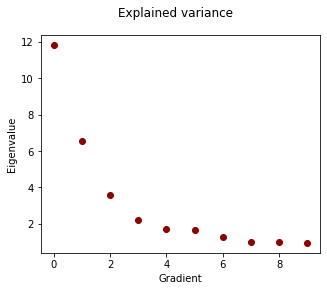

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, figsize=(5, 4))
ax.scatter(range(gm.lambdas_.size), gm.lambdas_, color="darkred")
ax.set_xlabel('Gradient')
ax.set_ylabel('Eigenvalue')

fig.suptitle("Explained variance")

plt.savefig(output_dir/"gradients/eigenvalues_funcgrad.png")
plt.show()

In [20]:
img = plot_cortical(array_name=parcel_to_surface(fc_grad1_schaefer, f'schaefer_{atlas_resolution}_conte69'), surface_name="conte69", size=(800, 200),
              cmap='Reds', color_bar=True, embed_nb=True, interactive=False, transparent_bg=False, 
              screenshot=True, filename=f"{output_dir}/gradients/functional_gradient1.png")
img = plot_cortical(array_name=parcel_to_surface(fc_grad2_schaefer, f'schaefer_{atlas_resolution}_conte69'), surface_name="conte69", size=(800, 200),
              cmap='Reds', color_bar=True, embed_nb=True, interactive=False, transparent_bg=False, 
              screenshot=True, filename=f"{output_dir}/gradients/functional_gradient2.png")

In [21]:
from python_functions.surface_contextualization import perform_spins # https://csi-hamburg.github.io/python_functions

analysis = "Functional connectivity gradient 1"
analysis_lower=analysis.replace(" ","_").lower()

r, p, d = perform_spins(
    fc_grad1_schaefer,
    thickness_data_schaefer,
    atlas_resolution="400")

result_dictionary[analysis_lower] = (r,p,d,fc_grad1_schaefer)

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000


In [22]:
from python_functions.surface_contextualization import perform_spins # https://csi-hamburg.github.io/python_functions

analysis = "Functional connectivity gradient 2"
analysis_lower=analysis.replace(" ","_").lower()

r, p, d = perform_spins(
    fc_grad2_schaefer,
    thickness_data_schaefer,
    atlas_resolution="400")

result_dictionary[analysis_lower] = (r,p,d,fc_grad2_schaefer)

permutation 100 of 1000
permutation 200 of 1000
permutation 300 of 1000
permutation 400 of 1000
permutation 500 of 1000
permutation 600 of 1000
permutation 700 of 1000
permutation 800 of 1000
permutation 900 of 1000
permutation 1000 of 1000


In [23]:
result_dictionary.keys()

dict_keys(['functional_degree_centrality', 'structural_degree_centrality', 'functional_neighborhood_abnormality', 'structural_neighborhood_abnormality', 'functional_connectivity_gradient_1', 'functional_connectivity_gradient_2'])

# Save results

In [24]:
import pickle
with open(output_dir/"result_dict.pickle", "wb") as pickle_file:
    pickle.dump(result_dictionary, pickle_file)

In [25]:
import pickle
with open(output_dir/"result_dict.pickle", "rb") as pickle_file:
    result_dictionary = pickle.load(pickle_file)

In [26]:
schaefer400_metric_dict = dict()
for key in result_dictionary.keys():
    schaefer400_metric_dict[key] = result_dictionary[key][3]

In [27]:
schaefer400_metric_df = pd.DataFrame(schaefer400_metric_dict, index=fc_ctx_labels)
schaefer400_metric_df.to_csv(output_dir/"spatial_correlations/schaefer400_metrics.csv")

# Network null models

In [28]:
from python_functions.surface_contextualization import *

In [29]:
def get_degree_centrality(mat, labels = fc_ctx_labels):
    if type(mat) != pd.core.frame.DataFrame:
            mat = pd.DataFrame(mat, columns=fc_ctx_labels, index=fc_ctx_labels)
    dc_rank = weighted_degree_centrality(mat, rank=True)
    print(dc_rank)

    return dc_rank.values

In [30]:
def get_functional_gradient_1(mat): 

    return connectivity_gradients(mat, 0, atlas_resolution=atlas_resolution)[0] * -1

def get_functional_gradient_2(mat): 

    return connectivity_gradients(mat, 1, atlas_resolution=atlas_resolution)[0]

In [31]:
def get_neighborhood_abnormality(mat): 
    return neighborhood_abnormality(mat, thickness_data_schaefer, fc_ctx_labels)

In [34]:
def get_r_from_nulls(i, mode, reference_score, functions):

    import pingouin as pg
    import pandas as pd 

    
    iter_r_dict = dict()
    iter_score_dict = dict()

    null = pd.read_csv(input_dir/f"network_rewiring/{mode}_matrices/{mode}_null_{i}.csv", header=None).values

    for f in functions:
    
        score = f(null)
        iter_score_dict[f.__name__] = score

        iter_r_dict[f.__name__] = pg.corr(score.squeeze(), reference_score.squeeze(), method='spearman')["r"][0]

    if i % 50 == 0:
        print(i)

    return iter_r_dict, iter_score_dict

In [ ]:
mode="fc"
i=0

from joblib import Parallel, delayed
parallel_output_func = Parallel(n_jobs=16)(delayed(get_r_from_nulls)(idx, "fc", thickness_data_schaefer, [get_degree_centrality, get_neighborhood_abnormality, get_functional_gradient_1, get_functional_gradient_2]) for idx in range(1000))

In [ ]:
mode="sc"
i=0

from joblib import Parallel, delayed
parallel_output_struc = Parallel(n_jobs=16)(delayed(get_r_from_nulls)(idx, "sc", thickness_data_schaefer, [get_degree_centrality, get_neighborhood_abnormality]) for idx in range(1000))

In [40]:
import pickle
with open(output_dir/"result_dict_maslov_func.pickle", "wb") as pickle_file:
    pickle.dump(parallel_output_func, pickle_file, protocol=pickle.HIGHEST_PROTOCOL)

import pickle
with open(output_dir/"result_dict_maslov_struc.pickle", "wb") as pickle_file:
    pickle.dump(parallel_output_struc, pickle_file, protocol=pickle.HIGHEST_PROTOCOL)

In [41]:
r_dicts_func = [parallel_output_func[idx][0] for idx in range(len(parallel_output_func))]
r_dicts_struc = [parallel_output_struc[idx][0] for idx in range(len(parallel_output_struc))]
r_df = pd.DataFrame(r_dicts_func).join(pd.DataFrame(r_dicts_struc), lsuffix="_func", rsuffix="_struc")

In [42]:
functional_analyses=["Functional degree centrality", "Functional neighborhood abnormality", 
    "Functional connectivity gradient 1", "Functional connectivity gradient 2"]
functional_analyses_lower = [analysis.replace(" ","_").lower() for analysis in functional_analyses]

In [43]:
structural_analyses=["Structural degree centrality", "Structural neighborhood abnormality"]
structural_analyses_lower = [analysis.replace(" ","_").lower() for analysis in structural_analyses]

In [44]:

r_functional_analyses = [result_dictionary[analysis][0] for analysis in functional_analyses_lower]
r_functional_analyses_dict = dict(zip(functional_analyses_lower, r_functional_analyses))

In [45]:
r_structural_analyses = [result_dictionary[analysis][0] for analysis in structural_analyses_lower]
r_structural_analyses_dict = dict(zip(structural_analyses_lower, r_structural_analyses))

In [46]:
r_combined = r_functional_analyses + r_structural_analyses
analyses_lower = functional_analyses_lower + structural_analyses_lower

In [49]:
p_value_dict_maslov = dict()
for idx,col in enumerate(list(r_df.columns)):
    p_value_right_tailed = np.mean(r_combined[idx] > r_df[col])
    p_value_left_tailed = np.mean(r_combined[idx] < r_df[col])
    p_value_two_tailed = np.minimum(p_value_right_tailed, p_value_left_tailed) * 2
    p_value_dict_maslov[analyses_lower[idx]] = p_value_two_tailed

In [52]:
p_value_dict_maslov

{'functional_degree_centrality': 0.876,
 'functional_neighborhood_abnormality': 0.0,
 'functional_connectivity_gradient_1': 0.012,
 'functional_connectivity_gradient_2': 0.0,
 'structural_degree_centrality': 0.068,
 'structural_neighborhood_abnormality': 0.0}

# BrainSMASH permutations

In [56]:
pd.DataFrame(thickness_data_schaefer).loc[:(thickness_data_schaefer.shape[0]/2 - 1)].to_csv(output_dir/f"brainsmash/thickness_data_schaefer{atlas_resolution}_left.txt", index=False, header=False, na_rep=np.nan)
pd.DataFrame(thickness_data_schaefer).loc[(thickness_data_schaefer.shape[0]/2):].to_csv(output_dir/f"brainsmash/thickness_data_schaefer{atlas_resolution}_right.txt", index=False, header=False, na_rep=np.nan)

In [58]:
from brainsmash.mapgen.base import Base
resolution=atlas_resolution
brain_map_file_left = str(output_dir/f"brainsmash/thickness_data_schaefer{resolution}_left.txt")  # use absolute paths if necessary!
brain_map_file_right = str(output_dir/f"brainsmash/thickness_data_schaefer{resolution}_right.txt")  # use absolute paths if necessary!
dist_mat_file_left = str(output_dir/f"brainsmash/Left{resolution}SchaeferGeodesicDistmat.txt")
dist_mat_file_right = str(output_dir/f"brainsmash/Right{resolution}SchaeferGeodesicDistmat.txt")

base_left = Base(x=brain_map_file_left, D=dist_mat_file_left)
base_right = Base(x=brain_map_file_right, D=dist_mat_file_right)

surrogates_left = base_left(n=1000)
surrogates_right = base_right(n=1000)

surrogates = np.hstack([surrogates_left, surrogates_right])

np.save(str(output_dir/f"brainsmash/thickness_data_schaefer{resolution}_surrogates.npy"),surrogates)

surrogates = np.load(str(output_dir/f"brainsmash/thickness_data_schaefer{resolution}_surrogates.npy"))

brainsmash_surrogates = pd.DataFrame(surrogates)

import pingouin as pg
map_list = [fc_ctx_dc_rank, sc_ctx_dc_rank, nghbr_fc_schaefer, nghbr_sc_schaefer, fc_grad1_schaefer, fc_grad2_schaefer]
r_dict_brainsmash = dict()
for idx,map in enumerate(map_list):
    r_dict_brainsmash[list(result_dictionary.keys())[idx]] = list(brainsmash_surrogates.apply(lambda x: pg.corr(x,map, method="spearman")["r"][0], axis=1))

brainsmash_surrogates = pd.DataFrame(brainsmash_surrogates)

r_df_brainsmash = pd.DataFrame(r_dict_brainsmash)

p_value_dict_brainsmash = dict()
for idx,key in enumerate(r_dict_brainsmash.keys()):
    p_value_right_tailed = np.mean(result_dictionary[key][0] > r_dict_brainsmash[key])
    p_value_left_tailed = np.mean(result_dictionary[key][0] < r_dict_brainsmash[key])
    p_value_two_tailed = np.minimum(p_value_right_tailed, p_value_left_tailed) * 2
    p_value_dict_brainsmash[key] = p_value_two_tailed

In [60]:
p_value_dict_brainsmash

{'functional_degree_centrality': 0.302,
 'structural_degree_centrality': 0.828,
 'functional_neighborhood_abnormality': 0.0,
 'structural_neighborhood_abnormality': 0.0,
 'functional_connectivity_gradient_1': 0.26,
 'functional_connectivity_gradient_2': 0.204}

# Plot scatterplots

In [61]:
pvals_uncorr = []
smash_pvals_uncorr = []
maslov_pvals_uncorr = []

for analysis_lower in list(result_dictionary.keys())[:6]:
    (_,p,_,_) = result_dictionary[analysis_lower]
    p_brainsmash = p_value_dict_brainsmash[analysis_lower]
    p_maslov = p_value_dict_maslov[analysis_lower]
    pvals_uncorr.append(p)
    smash_pvals_uncorr.append(p_brainsmash)
    maslov_pvals_uncorr.append(p_maslov)

from pingouin import multicomp
pvals_fdr = multicomp(pvals_uncorr, method="fdr_bh")[1]
pvals_fdr = dict(zip(result_dictionary.keys(),pvals_fdr))
smash_pvals_fdr = multicomp(smash_pvals_uncorr, method="fdr_bh")[1]
smash_pvals_fdr = dict(zip(result_dictionary.keys(),smash_pvals_fdr))
maslov_pvals_fdr = multicomp(maslov_pvals_uncorr, method="fdr_bh")[1]
maslov_pvals_fdr = dict(zip(result_dictionary.keys(),maslov_pvals_fdr))

In [62]:
def plot_spatial_correlation(analysis, p_brainsmash, p_maslov):
    from python_functions.surface_contextualization import plot_null_distributions # https://csi-hamburg.github.io/python_functions

    analysis_lower=analysis.replace(" ","_").lower()
    (r,p,d,_) = result_dictionary[analysis_lower]
    p = pvals_fdr[analysis_lower]

    from python_functions.plotting import plot_scatter # https://csi-hamburg.github.io/python_functions

    if p < 0.001 : p = "<0.001"
    else: p = f"{p:.3f}"

    if p_brainsmash < 0.001 : p_brainsmash = "<0.001"
    else: p_brainsmash = f"{p_brainsmash:.3f}"

    if p_maslov < 0.001 : p_maslov = "<0.001"
    else: p_maslov = f"{p_maslov:.3f}"

    map_schaefer = result_dictionary[analysis_lower][3]
    data_schaefer = thickness_data_schaefer

    cmap = "Reds"
    sensitivity_type = r"$p_{smash}$"

    if "structural" in analysis_lower:
        cmap = "Blues"

    fig = plot_scatter(map_schaefer, analysis, data_schaefer, r"Bootstrap ratio", annotation_dict={'$r_{sp}$':r,'|  $p_{spin}$':p, sensitivity_type:p_brainsmash, "$p_{rewire}$":p_maslov}, cmap=cmap, loc_annot='upper right', pad_annot=-1.5, frameon_annot=False)
    fig.savefig(output_dir/f"spatial_correlations/thickness_data_{analysis_lower}.png", dpi=300)

No handles with labels found to put in legend.


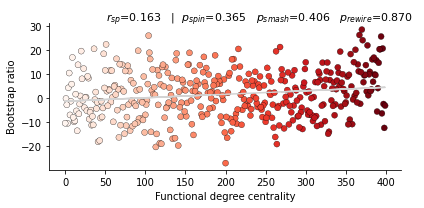

No handles with labels found to put in legend.


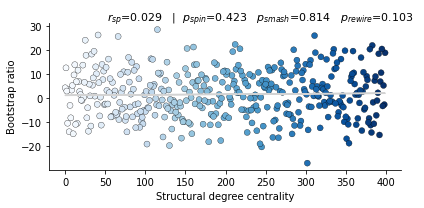

No handles with labels found to put in legend.


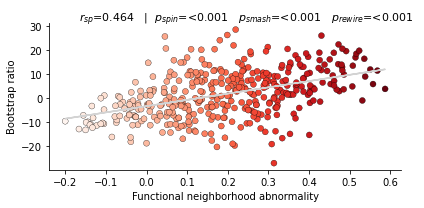

No handles with labels found to put in legend.


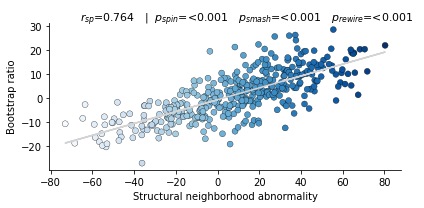

No handles with labels found to put in legend.


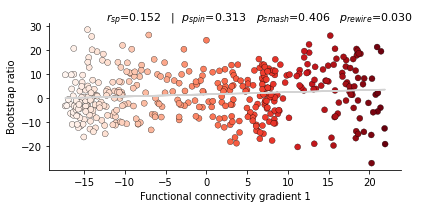

No handles with labels found to put in legend.


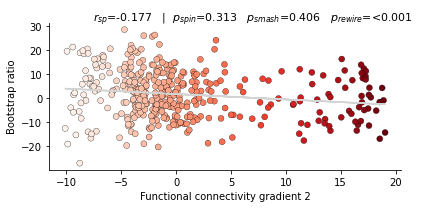

In [ ]:
for analysis_lower in list(result_dictionary.keys())[:6]:
    analysis = analysis_lower.replace("_"," ").capitalize()
    p_brainsmash = smash_pvals_fdr[analysis_lower]
    p_maslov = maslov_pvals_fdr[analysis_lower]
    plot_spatial_correlation(analysis, p_brainsmash, p_maslov)

# Summary figure

In [66]:
old_labels = ['functional_degree_centrality', 'structural_degree_centrality', 'functional_neighborhood_abnormality', 
'structural_neighborhood_abnormality', 'functional_connectivity_gradient_1', 'functional_connectivity_gradient_2',]
new_labels = ['FC d. centrality', 'SC d. centrality', "FC neighborhood", "SC neighborhood",
    "FC gradient 1", "FC gradient 2"]

label_dict = dict(zip(old_labels,new_labels))

cohort=["r"]
cohort_styled = ['HCHS']
cohort_dict=dict(zip(cohort,cohort_styled))

In [67]:
r_values_dict = {k:v[0] for k,v in result_dictionary.items()}
p_values_dict = pvals_fdr
r_df = pd.DataFrame(r_values_dict, index=["r"]).T
p_df = pd.DataFrame(p_values_dict, index=["p"]).T
r_df = r_df.loc[label_dict.keys()]
p_df = p_df.loc[label_dict.keys()]
r_df = r_df.reset_index().rename({'index':'metric'}, axis=1)
p_df = p_df.reset_index().rename({'index':'metric'}, axis=1)
r_df["metric"] = r_df["metric"].replace(label_dict)
p_df["metric"] = p_df["metric"].replace(label_dict)
p_df["sig"] = np.where(p_df["p"] < 0.05, True, False)

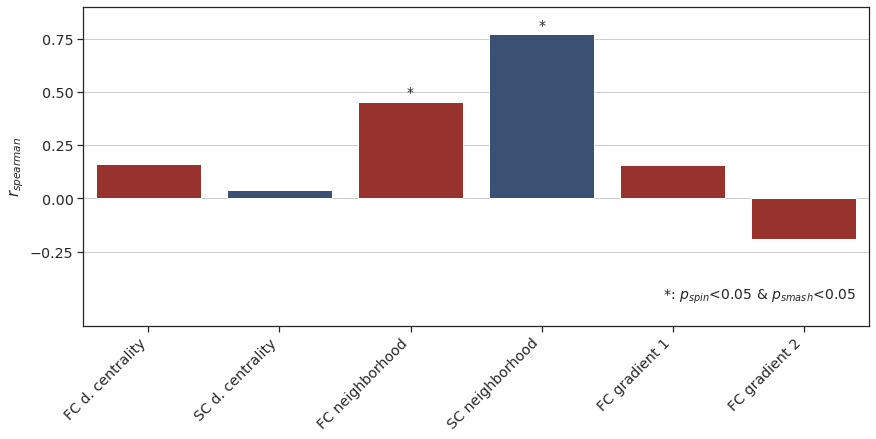

In [ ]:
import seaborn as sns

newwidth=0.1

sns.set(font_scale=1.3, style="whitegrid")
sns.set_style("ticks",{'axes.grid' : True})
fig, ax = plt.subplots(1, figsize=(12,6), constrained_layout=True)

barplot = sns.barplot(x="metric", y="r", hue="metric", data=r_df, palette=colors, ax=ax, dodge=False)
ax.set_ylabel(f'$r_{{spearman}}$', size=15)

ax.set_xlabel(f'', size=17)
ax.set_ylim((-0.6,0.9))
plt.yticks([0.75,0.5,0.25,0,-0.25])
plt.xticks(ha="right", rotation=45, visible=True)
ax.get_legend().remove()

for idx,p in enumerate(barplot.patches):
    if idx == 6: break
    height = r_df["r"][idx]

    if p_df["sig"][idx] == True:
        if height < 0: nudge = 0.01
        else: nudge=0.1
        barplot.annotate("*", 
                    ((p.get_x() + p.get_width() / 2) , height + nudge),
                    ha = 'center', va = 'center', 
                    size=14,
                    xytext = (0, -12), 
                    textcoords = 'offset points')

barplot.annotate(f"*: $p_{{spin}}$<0.05 & $p_{{smash}}$<0.05", (5.4,-0.46), ha="right", va="center", size=14)

plt.savefig(output_dir/"spatial_correlations/summary.png", dpi=300)